<a href="https://colab.research.google.com/github/1kishor0/Machine-Learning-and-Deep-Learning-approach-on-Contact-Lens-data/blob/main/ML_DL_on_Contact_Lens_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Classifier

In [329]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [330]:
# load the Contact Lens dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/lenses/lenses.data'
lenses = pd.read_csv(url, header=None, delim_whitespace=True, names=['age', 'prescript', 'astigmatic', 'tear_rate', 'class'])

In [331]:
# drop the missing values
#lenses = lenses.dropna()

In [332]:
lenses

,age,prescript,astigmatic,tear_rate,class
1,1,1,1,1,3
2,1,1,1,2,2
3,1,1,2,1,3
4,1,1,2,2,1
5,1,2,1,1,3
6,1,2,1,2,2
7,1,2,2,1,3
8,1,2,2,2,1
9,2,1,1,1,3
10,2,1,1,2,2


In [333]:
# separate features and target variable
X = lenses.drop('class', axis=1)
y = lenses['class']

In [334]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [335]:
from sklearn.metrics import accuracy_score

# create empty list to store accuracy scores
scores = []

In [336]:
# try different values of n_neighbors and calculate accuracy scores
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    scores.append(acc_score)
    print(f"Accuracy score for k={k}: {acc_score:.2f}")


Accuracy score for k=1: 0.60
Accuracy score for k=2: 0.60
Accuracy score for k=3: 1.00
Accuracy score for k=4: 1.00
Accuracy score for k=5: 1.00
Accuracy score for k=6: 0.80
Accuracy score for k=7: 0.80
Accuracy score for k=8: 0.60
Accuracy score for k=9: 0.60
Accuracy score for k=10: 0.60


# Decision Tree

In [337]:
# Split the data into features and target variable
X = lenses.drop('class', axis=1)
y = lenses['class']

In [338]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [339]:
# Train the decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [340]:
# Make predictions on the test data
y_pred = dt.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


# Neural Network

In [405]:
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [406]:
# load the Contact Lens dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/lenses/lenses.data'
df = pd.read_csv(url, sep='\s+', header=None, names=['age', 'prescription', 'astigmatic', 'tear_rate', 'class'])

In [407]:

X = df.drop('class', axis=1)
y = pd.get_dummies(df['class']) # Convert the categorical target variable into one-hot encoded vectors

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [409]:
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(16, input_dim=4, activation='relu'),
tf.keras.layers.Dense(3, activation='softmax')
])

In [410]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [411]:
history=model.fit(X_train, y_train, epochs=50, batch_size=16,validation_split=0.2)

Epoch 1/50
1/1 [==============================] - 1s 762ms/step - loss: 1.1707 - accuracy: 0.1333 - val_loss: 1.2266 - val_accuracy: 0.2500
Epoch 2/50
1/1 [==============================] - 0s 46ms/step - loss: 1.1604 - accuracy: 0.1333 - val_loss: 1.2173 - val_accuracy: 0.2500
Epoch 3/50
1/1 [==============================] - 0s 44ms/step - loss: 1.1501 - accuracy: 0.1333 - val_loss: 1.2084 - val_accuracy: 0.2500
Epoch 4/50
1/1 [==============================] - 0s 41ms/step - loss: 1.1399 - accuracy: 0.2667 - val_loss: 1.1999 - val_accuracy: 0.2500
Epoch 5/50
1/1 [==============================] - 0s 40ms/step - loss: 1.1298 - accuracy: 0.2667 - val_loss: 1.1917 - val_accuracy: 0.2500
Epoch 6/50
1/1 [==============================] - 0s 42ms/step - loss: 1.1199 - accuracy: 0.3333 - val_loss: 1.1838 - val_accuracy: 0.2500
Epoch 7/50
1/1 [==============================] - 0s 43ms/step - loss: 1.1102 - accuracy: 0.3333 - val_loss: 1.1756 - val_accuracy: 0.2500
Epoch 8/50
1/1 [==========

In [412]:
# save model
model.save('path/to/model.h5')

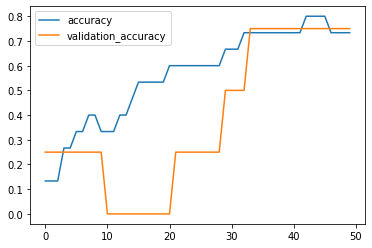

In [413]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.show()

# Using MultiLayer Perceptron

In [350]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/lenses/lenses.data'
df = pd.read_csv(url, sep='\s+', header=None, names=['age', 'prescription', 'astigmatic', 'tear_rate', 'class'])

In [351]:
# Split the data into features and target variable
X = df.drop('class', axis=1)
y = df['class']

In [352]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [353]:
# Build the neural network model
mlp = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000)

In [354]:
# Make predictions on the test set
y_pred = mlp.predict(X_test)

In [355]:
# Calculate the accuracy score
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc_score:.2f}")

Accuracy score: 0.75
